In [1]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

Набор данных: Искусственно сгенерированные данные, имитирующие реальный рынок недвижимости. Каждая точка данных представляет собой квартиру с характеристиками:

Площадь: от 30 до 120 м² (равномерное распределение для простоты понимания)

Цена: рассчитана как 50 тыс.₽/м² с добавлением случайного шума (±300 тыс.₽)

Математическая модель:
Предполагаем линейную зависимость цены (y) от площади (x):

In [2]:
np.random.seed(42)
areas = np.random.uniform(30, 120, 50)  # Площади от 30 до 120 кв.м
prices = 50 * areas + np.random.normal(0, 300, 50)  # Примерно 50k за кв.м + шум
prices = np.clip(prices, 1000, 10000)  # Ограничим цены разумными пределами

# Преобразуем в правильный формат
X = areas.reshape(-1, 1)
y = prices

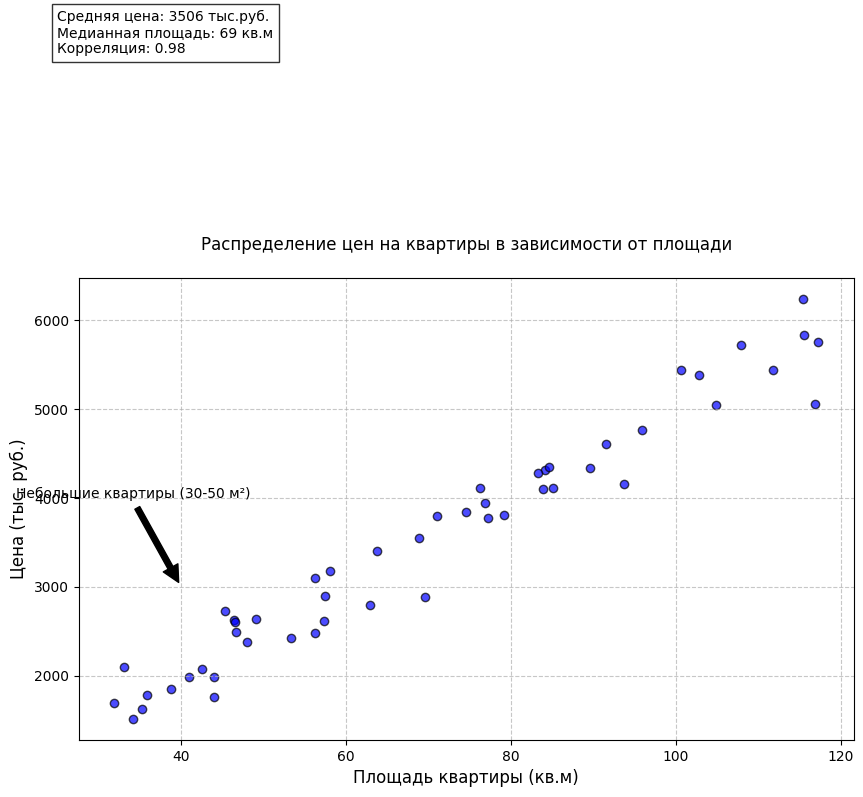

In [3]:
#  визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(areas, prices, alpha=0.7, color='blue', edgecolor='k')
plt.title('Распределение цен на квартиры в зависимости от площади', pad=20)
plt.xlabel('Площадь квартиры (кв.м)', fontsize=12)
plt.ylabel('Цена (тыс. руб.)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

#  аннотации
plt.annotate('Небольшие квартиры (30-50 м²)', xy=(40, 3000), xytext=(20, 4000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Премиум сегмент', xy=(110, 8000), xytext=(90, 7000),
             arrowprops=dict(facecolor='black', shrink=0.05))

#  основные статистики
stats_text = f"""Средняя цена: {np.mean(prices):.0f} тыс.руб.
Медианная площадь: {np.median(areas):.0f} кв.м
Корреляция: {np.corrcoef(areas, prices)[0,1]:.2f}"""
plt.text(25, 9000, stats_text, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


Дано:
- Набор наблюдений: $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$
- Где $x_i$ — признаки ( площадь квартиры)
- $y_i$ — целевая переменная ( цена)

Цель:
Найти параметры $w$ (наклон) и $b$ (смещение), такие что:

$$\hat{y_i} = w \cdot x_i + b$$

где $\hat{y_i}$ — предсказанное значение, максимально близкое к истинному $y_i$.

Линейная регрессия - это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями. Линейная регрессия проста, что является преимуществом, но в то же время у нее нет инструментов, позволяющих контролировать сложность модели.

Параметры "наклона" (w), также называемые весами или коэффициентами (coefficients), хранятся в атрибуте coef_, тогда как сдвиг (offset) или константа (intercept), обозначаемая как b, хранится в атрибуте intercept_:

# Параметры линейной регрессии

В модели линейной регрессии `y = w·x + b`:
- **w (coef_)** - вектор весов (коэффициенты наклона):
  - Показывает, на сколько изменяется целевая переменная при изменении признака на 1 единицу
  - Для многомерного случая - это вектор (по одному весу на каждый признак)
  
- **b (intercept_)** - смещение (интерсепт):
  - Значение целевой переменной при нулевых значениях всех признаков
  - "Базовая" составляющая предсказания

## Важные нюансы:

1. Порядок коэффициентов в `coef_` соответствует порядку признаков в X
2. Если применили стандартизацию, коэффициенты интерпретируются относительно масштабированных признаков
3. Интерсепт может не иметь физического смысла, если признаки не включают нулевые значения

In [4]:
# Обучаем эталонную модель
model = LinearRegression()
model.fit(X, y)
optimal_k = model.coef_[0]
optimal_b = model.intercept_

## Особенности хранения параметров в sklearn:

1. **model.coef_**:
   - Всегда возвращается как массив numpy (даже для одного признака)
   - Для многомерной регрессии содержит коэффициенты для каждого признака

   Пример для 3 признаков:
    [w1, w2, w3] для модели y = w1*x1 + w2*x2 + w3*x3 + b

2. **model.intercept_**:
  - Всегда скалярное значение
  - В многомерном случае представляет общее смещение

## Оптимальные параметры

Решение в замкнутой форме (нормальные уравнения):

$$
k = \frac{\text{Cov}(x,y)}{\text{Var}(x)} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - k \cdot \bar{x}
$$

Где:
- $\bar{x}$, $\bar{y}$ — средние значения
- $\text{Cov}(x,y)$ — ковариация
- $\text{Var}(x)$ — дисперсия

## Метрики качества

1. **MSE (Mean Squared Error):**
   $$ \text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2 $$
   - Средний квадрат ошибок
   - Чем меньше, тем лучше
   - Чувствителен к выбросам

2. **$R^2$ (Коэффициент детерминации):**
   $$ R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2} $$
   - Доля объясненной дисперсии
   - Диапазон: от 0 (плохо) до 1 (идеально)

Попробуйте ниже в интерактивном режиме:
1. Подберите параметры так, чтобы красная линия лучше всего описывала данные
2. Сравните с оптимальной линией (зеленая пунктирная)

Метрики:
- MSE (Среднеквадратичная ошибка) - чем меньше, тем лучше
- R² (R-квадрат) - от 0 до 1, чем ближе к 1, тем лучше модель


In [5]:
def plot_regression(k=30, b=500, show_optimal=True):
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y, alpha=0.7, label='Квартиры')

    x_vals = np.array([X.min(), X.max()])
    y_vals = k * x_vals + b
    plt.plot(x_vals, y_vals, 'r-', linewidth=2,
             label=f'Ваша модель: Цена = {k:.1f}×Площадь + {b:.1f}')

    if show_optimal:
        y_opt = optimal_k * x_vals + optimal_b
        plt.plot(x_vals, y_opt, 'g--', linewidth=2,
                 label=f'Оптимальная: Цена = {optimal_k:.1f}×Площадь + {optimal_b:.1f}')



    # Вычисляем метрики
    mse = mean_squared_error(y, k * X + b)
    r2 = r2_score(y, k * X + b)

    plt.title(f'Зависимость цены от площади (MSE = {mse:,.0f}, R² = {r2:.2f})')
    plt.xlabel('Площадь квартиры (кв.м)')
    plt.ylabel('Цена (тыс. $)')
    plt.legend()
    plt.grid(True)
    plt.show()

k_slider = widgets.FloatSlider(value=30, min=0, max=100, step=0.5,
                              description='Цена за кв.м:',
                              continuous_update=False)

b_slider = widgets.FloatSlider(value=500, min=-2000, max=3000, step=100,
                              description='Базовая цена:',
                              continuous_update=False)

optimal_check = widgets.Checkbox(value=True, description='Показать оптимальную линию')

ui = widgets.VBox([
    widgets.HBox([k_slider, b_slider]),
    widgets.HBox([optimal_check])
])
out = widgets.interactive_output(plot_regression, {
    'k': k_slider,
    'b': b_slider,
    'show_optimal': optimal_check,
})
display(ui, out)


Output()